# Prediction tasks

Performance on state prediction tasks for the `ebmt` and `customers` datasets.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from mixmarkov.plotting import setup_plotting

In [2]:
setup_plotting()

Plotting settings loaded!


In [3]:
%%html
<style>
table {align:left; display:block}
</style>

`ebmt` dataset

| Model     | no offset | w/ offset |
|-----------|-----------|-----------|
| CTMC      |     1.043 |     1.043 |
| Inf. mix. |     0.907 |     0.617 |
| Fin. mix. |     1.605 |     0.786 |

`customers` dataset

| Model     | no offset | w/ offset |
|-----------|-----------|-----------|
| DTMC      |     0.480 |     0.480 |
| Inf. mix. |     0.471 |     0.448 |
| Fin. mix. |     0.489 |     0.462 |
| RNN       |     0.482 |     0.468 |

## Predictive log-loss / effect of past

In [4]:
ebmt = (
    ("CTMC", 1.043, 1.043),
    ("Fin. mix.", 1.605, 0.786),
    ("Inf. mix.", 0.907, 0.617),
)

cust = (
    ("DTMC", 0.480, 0.480),
    ("RNN", 0.482, 0.468),
    ("Fin. mix.", 0.489, 0.462),
    ("Inf. mix.", 0.471, 0.448),
)

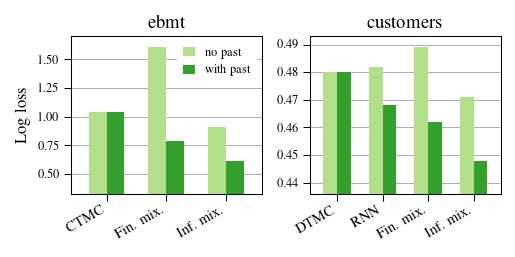

In [5]:
fig, axs = plt.subplots(ncols=2, figsize=(3.7, 1.4))

for ax, vals, title in zip(axs, (ebmt, cust), ("ebmt", "customers")):
    labels, ys1, ys2 = map(np.array, zip(*vals))
    idx = np.arange(len(labels))
    ax.bar(idx-0.15, ys1, width=0.3, color=plt.cm.Paired(2), label="no past")
    ax.bar(idx+0.15, ys2, width=0.3, color=plt.cm.Paired(3), label="with past")
    top = 1.15 * np.max(ys1)
    ax.set_title(title, pad=4.0)
    #ax.set_yticks(data[i]["ticks"])
    ymin = min(ys1.min(), ys2.min())
    ymax = max(ys1.max(), ys2.max())
    bottom = ymin - (ymax - ymin) * 0.3
    top = ymax + (ymax - ymin) * 0.1
    ax.set_ylim(bottom=bottom, top=top)
    ax.set_xlim(idx[0] - 0.6, idx[-1] + 0.6)
    ax.set_xticks(idx)
    ax.set_xticklabels(labels, ha="right", rotation=30)
    ax.grid(axis="y", lw=0.5)
    ax.set_axisbelow(True)
    ax.tick_params(axis='y', labelsize=6, pad=1.5)
    ax.tick_params(axis='x', labelsize=7, pad=1.0)

axs[0].legend(fontsize=6, frameon=True, framealpha=1.0, edgecolor="w", handlelength=1.0)
axs[0].set_ylabel(r"Log loss")

fig.subplots_adjust(wspace=0.25)
fig.savefig("prediction2.pdf", bbox_inches="tight")